## TASKS
1. Create a Jupyter notebook and load the attached dataset anscombes_quartet.txt<br>
This dataset consists of two variables x and y in the first two columns coming from four different datasets indicated in the third column.

2. Use descriptive statistics to explore this dataset. For each of the datasets<br>
(a) Compute the mean, standard deviation for the variables x, y . <br>
(b) Fit a linear regression to y = mx +b, you can use Scipy's stats.linregress() and determine m, b and the correlation coefficient.<br>
Do you notice something peculiar?

3. Visualise the dataset using Matplotlib<br>
(a) Plot a histogram of the distribution of the variables x and y for each dataset<br>
(b) Create a scatter plot of x and y (for each dataset) to visualise the dependence of these two variables.

4. Observe the numbers you obtained in 2. and the plots from 3. and write a summary of your observations.

## Import Libraries and load + beautify the DataFrame

In [63]:
import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
file = "week2_optional_dataset.txt"
df = pd.read_csv(file)
df.head()

,#x,y,dataset
0,10.0,8.04,0.0
1,8.0,6.95,0.0
2,13.0,7.58,0.0
3,9.0,8.81,0.0
4,11.0,8.33,0.0


In [4]:
df["dataset"] = df["dataset"].astype("int")
df.columns = ["X", "Y", "Dataset Number"]
df.head()

,X,Y,Dataset Number
0,10.0,8.04,0
1,8.0,6.95,0
2,13.0,7.58,0
3,9.0,8.81,0
4,11.0,8.33,0


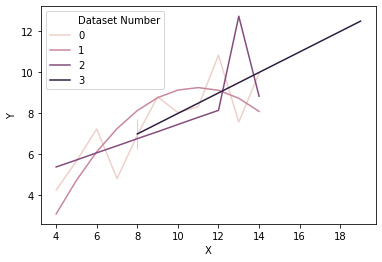

In [65]:
sns.lineplot(x="X", y="Y", hue="Dataset Number", data=df)

## Create subsets for the respective Datasets

In [8]:
df0 = df.loc[df["Dataset Number"] == 0]
df1 = df.loc[df["Dataset Number"] == 1]
df2 = df.loc[df["Dataset Number"] == 2]
df3 = df.loc[df["Dataset Number"] == 3]

In [15]:
print("""DF's Shape: {}
DF0's Shape: {}
DF1's Shape: {}
DF2's Shape: {}
DF3's Shape: {}
""".format(df.shape, df0.shape, df1.shape, df2.shape, df3.shape))

DF's Shape: (44, 3)
DF0's Shape: (11, 3)
DF1's Shape: (11, 3)
DF2's Shape: (11, 3)
DF3's Shape: (11, 3)



## Descriptive Statistics
Compute Mean & Standard Deviation for x|y<br>
Determine the Parameters for a Linear Regression

In [33]:
sub_dfs = [df0, df1, df2, df3]
results = {"Set0": {}, "Set1": {}, "Set2": {}, "Set3": {}}

In [38]:
for num in range(4):
    frame = sub_dfs[num]
    linreg = scipy.stats.linregress(x=frame.X, y=frame.Y)
    results["Set{}".format(num)] = {"Slope": linreg.slope, 
                                    "Intercept": linreg.intercept, 
                                    "Rvalue": linreg.rvalue,
                                    "Mean_X": np.mean(frame.X),
                                    "Mean_Y": np.mean(frame.Y),
                                    "StD_X": np.std(frame.X),
                                    "StD_Y": np.std(frame.Y)}
    

In [72]:
for num in range(4):
    print("The X_Mean of Set{} is {:.2f}".format(num, results["Set{}".format(num)]["Mean_X"]))
for num in range(4):
    print("The Y_Mean of Set{} is {:.2f}".format(num, results["Set{}".format(num)]["Mean_Y"]))
for num in range(4):
    print("The X_StD of Set{} is {:.2f}".format(num, results["Set{}".format(num)]["StD_X"]))
for num in range(4):
    print("The Y_StD of Set{} is {:.2f}".format(num, results["Set{}".format(num)]["StD_Y"]))
for num in range(4):
    print("The Rvalue of Set{} is {:.2f}".format(num, results["Set{}".format(num)]["Rvalue"]))

The X_Mean of Set0 is 9.00
The X_Mean of Set1 is 9.00
The X_Mean of Set2 is 9.00
The X_Mean of Set3 is 9.00
The Y_Mean of Set0 is 7.50
The Y_Mean of Set1 is 7.50
The Y_Mean of Set2 is 7.50
The Y_Mean of Set3 is 7.50
The X_StD of Set0 is 3.16
The X_StD of Set1 is 3.16
The X_StD of Set2 is 3.16
The X_StD of Set3 is 3.16
The Y_StD of Set0 is 1.94
The Y_StD of Set1 is 1.94
The Y_StD of Set2 is 1.94
The Y_StD of Set3 is 1.94
The Rvalue of Set0 is 0.82
The Rvalue of Set1 is 0.82
The Rvalue of Set2 is 0.82
The Rvalue of Set3 is 0.82


<br>

<span style="background:yellow">
Even tough the figures from the 4 datasets display completely different shapes, they still share the same values for means, standard deviations and r-/rsquarred-values! Only looking at these metrics can cause confusion and the wrong belief, these datasets might be from the same distribution!</span>

<br>

## Visualization with Matplotlib and Seaborn
Histograms for the X/Y Distributions<br>
Scatterplot for X/Y

(array([0.2507837 , 0.2507837 , 0.12539185, 0.        , 0.06269592]),
 array([ 5.25,  6.7 ,  8.15,  9.6 , 11.05, 12.5 ]),
 <a list of 5 Patch objects>)

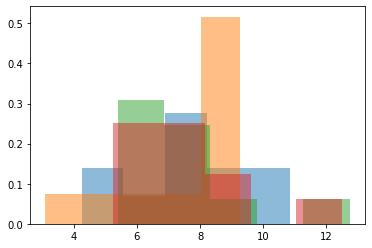

In [172]:
plt.hist(df0.Y, alpha=0.5, bins=5, density=True)
plt.hist(df1.Y, alpha=0.5, bins=5, density=True)
plt.hist(df2.Y, alpha=0.5, bins=5, density=True)
plt.hist(df3.Y, alpha=0.5, bins=5, density=True)


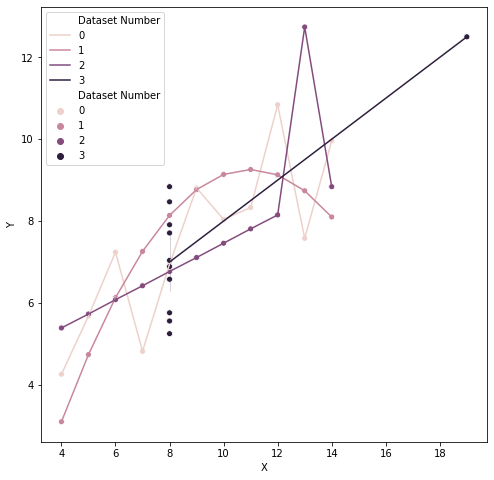

In [107]:
plt.figure(figsize=(8,8))
sns.scatterplot(x="X", y="Y", hue="Dataset Number", data=df)
sns.lineplot(x="X", y="Y", hue="Dataset Number", data=df)

<br>

<span style="background:orange">
Even tough the figures from the 4 datasets display completely different shapes, they still share the same values for means, standard deviations and r-/rsquarred-values! Only looking at these metrics can cause confusion and the wrong belief that these datasets might be from the same distribution! <br>Looking at the scatterplots/lineplots and the histograms for the y-values, one can clearly see that these 4 datasets containt different distributions!</span>